In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud

# display settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Reading and understanding data

In [3]:
# initializing dataframe
df = pd.read_csv("/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv")

In [4]:
# dataframe shape
df.shape

(17007, 18)

In [5]:
# column info
list(df.columns)

['URL',
 'ID',
 'Name',
 'Subtitle',
 'Icon URL',
 'Average User Rating',
 'User Rating Count',
 'Price',
 'In-app Purchases',
 'Description',
 'Developer',
 'Age Rating',
 'Languages',
 'Size',
 'Primary Genre',
 'Genres',
 'Original Release Date',
 'Current Version Release Date']

### Columns info:
**URL** The URL
<br>**ID** The assigned ID
<br>**Name** The name
<br>**Subtitle** The secondary text under the name
<br>**Icon URL** 512px x 512px jpg
<br>**Average User Rating** Rounded to nearest .5, requires at least 5 ratings
<br>**User Rating Count** Number of ratings internationally, null means it is below 5
<br>**Price** Price in USD
<br>**In-app Purchases** Prices of available in-app purchases
<br>**Description** App description
<br>**Developer** App developer
<br>**Age Rating** Either 4+, 9+, 12+ or 17+
<br>**Languages** ISO2A language codes
<br>**Size** Size of the app in bytes
<br>**Primary Genre** Main genre
<br>**Genres** Genres of the app
<br>**Original Release Date** When it was released
<br>**Current Version Release Date** When it was last updated

In [6]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [7]:
# printing the first 5 rows
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# Data pre-processing and cleaning

### Dropping the unnecessary columns

In [8]:
# dropping the columns URL, ID, Icon URL
df.drop(columns=["URL","ID","Icon URL"], inplace=True)

### Column-wise missing values 

In [9]:
# finding the no. of missing values in each column
df.isna().sum()

Name                                0
Subtitle                        11746
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

### Subtitle

In [10]:
# taking an initial look at the values and scanning for junk values
df["Subtitle"].dropna()

5                                  Original brain training
19                          Sudoku, Jigsaw, Killer, Kakuro
27                                 Game of Global Conquest
33                          For beginners to professionals
36                                     Fun and easy to use
45                               World Domination Supreme!
55                                    Circular puzzle game
66                                            2019 Edition
73                                          Japanese Chess
75                                          A trading game
78                          Design Manage Build, have Fun!
85                            The classic balloon pop game
90                                Turn-Based Strategy game
103                           Learn to play the game of Go
105                         Design Manage Build, have Fun!
106                               Classic Defense Strategy
112                                      European Conque

Looks like there are no junk values.

### Average User Rating

In [11]:
# no. of rows in each rating bracket
df["Average User Rating"].value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: Average User Rating, dtype: int64

In [12]:
# summary statistics
df["Average User Rating"].describe()

count    7561.000000
mean        4.060905
std         0.751428
min         1.000000
25%         3.500000
50%         4.500000
75%         4.500000
max         5.000000
Name: Average User Rating, dtype: float64

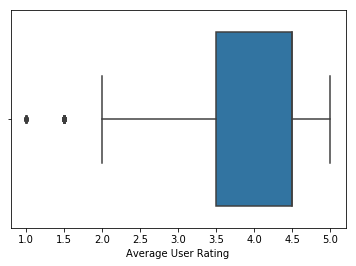

In [13]:
# plotting the boxplot to understand the outliers
sns.boxplot(df["Average User Rating"])
plt.show()

Looks like there are no (negligeble) outliers or junk values.

### User Rating Count

In [14]:
# taking an initial look at the values and scanning for junk values
df["User Rating Count"].dropna().sort_values()

4891           5.0
626            5.0
7114           5.0
2867           5.0
2866           5.0
2858           5.0
10977          5.0
2894           5.0
10983          5.0
2797           5.0
11016          5.0
14712          5.0
5614           5.0
11047          5.0
5619           5.0
2800           5.0
14667          5.0
2911           5.0
14815          5.0
14904          5.0
10778          5.0
14900          5.0
14897          5.0
10801          5.0
2994           5.0
7126           5.0
10807          5.0
10820          5.0
10842          5.0
5572           5.0
2949           5.0
10864          5.0
608            5.0
5538           5.0
14664          5.0
5648           5.0
2688           5.0
14463          5.0
2494           5.0
2491           5.0
11420          5.0
16967          5.0
8031           5.0
6988           5.0
2458           5.0
5818           5.0
2448           5.0
2437           5.0
2433           5.0
8718           5.0
11490          5.0
5810           5.0
2523        

In [15]:
# summary statistics
df["User Rating Count"].describe()

count    7.561000e+03
mean     3.306531e+03
std      4.232256e+04
min      5.000000e+00
25%      1.200000e+01
50%      4.600000e+01
75%      3.090000e+02
max      3.032734e+06
Name: User Rating Count, dtype: float64

Looks like there are few outlier values at the higher end. Let's plot boxplot to find it out.

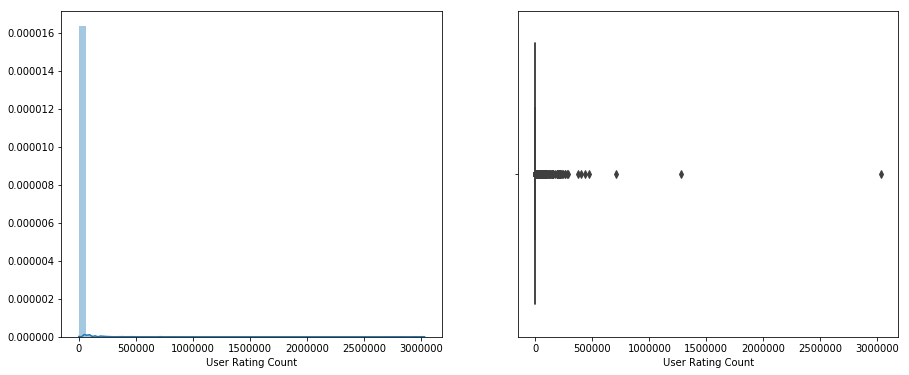

In [16]:
# boxplot and distribution plot
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df["User Rating Count"].dropna(), ax=ax[0])
sns.boxplot(df["User Rating Count"].dropna(), ax=ax[1])
plt.show()

Since these are user rating count values, we do not clean the outliers as they have no or little impact. 

### Price

In [17]:
# checking the different price brackets
df["Price"].value_counts().sort_index()

0.00      14212
0.99       1078
1.99        515
2.99        471
3.99        163
4.99        237
5.99         42
6.99         32
7.99         17
8.99         13
9.99         88
11.99        59
12.99         3
14.99         4
16.99         2
18.99         1
19.99         9
29.99         2
36.99         1
37.99         1
59.99         1
99.99         1
139.99        1
179.99       30
Name: Price, dtype: int64

In [18]:
# summary statistics
df["Price"].describe()

count    16983.000000
mean         0.813419
std          7.835732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        179.990000
Name: Price, dtype: float64

Looks like we can categorize the price into price range brackets.

### In-app Purchaces

In [19]:
# splitting the string into float values and storing them as a list
df["In-app Purchases"] = df["In-app Purchases"].dropna().map(lambda x: list(float(i) for i in x.split(", ")))

### Languages

In [20]:
# splitting the string and storing the values as a list
df["Languages"] = df["Languages"].dropna().map(lambda x: x.split(", "))

### Size

In [21]:
# filling the missing value
df["Size"].fillna(method="ffill", inplace=True)

In [22]:
# converting size in bytes to mega-bytes
df["Size"] = df["Size"].map(lambda x: round(x/(1024 * 1024), 2))
df["Size"].head()

0    15.12
1    11.76
2     0.64
3    20.55
4    33.08
Name: Size, dtype: float64

### Genres

In [23]:
# splitting the string and storing the values as a list
df["Genres"] = df["Genres"].map(lambda x: x.split(", "))
df["Genres"].head()

0              [Games, Strategy, Puzzle]
1               [Games, Strategy, Board]
2               [Games, Board, Strategy]
3              [Games, Strategy, Puzzle]
4    [Games, Strategy, Board, Education]
Name: Genres, dtype: object

### Original Release Date

In [24]:
# converting string to date
df["Original Release Date"] = df["Original Release Date"].map(lambda x: datetime.strptime(x, "%d/%m/%Y"))

### Current Version Release Date

In [25]:
# converting string to date
df["Current Version Release Date"] = df["Current Version Release Date"].map(lambda x: datetime.strptime(x, "%d/%m/%Y"))

# Feature engineering

## Pricing bracket
Creating four pricing brackets based on the Price variable.

**Free** 0.00
<br>**Low Price** 0.99 - 4.99
<br>**Medium Price** 5.99 - 19.99
<br>**High Price** > 19.99

In [26]:
# categorizing price
df["Price Range"] = df["Price"].dropna().map(lambda x: "Free" if x == 0.00 else("Low Price" if 0.99 <= x <= 4.99 else("Medium Price" if 5.99 <= x <= 19.99 else "High Price")))
df["Price Range"].value_counts()

Free            14212
Low Price        2464
Medium Price      270
High Price         37
Name: Price Range, dtype: int64

## Total In-app Purchases

Creating a new variable to show the sum of the In-app Purchases values.

In [27]:
df["Total In-app Purchases"] = df["In-app Purchases"].dropna().map(lambda x: sum(x))
df["Total In-app Purchases"].dropna().value_counts().head()

0.99    945
2.99    608
1.99    562
4.99    154
1.98    142
Name: Total In-app Purchases, dtype: int64

## Game Genre
Creating a new variable to capture the genre of each game.

In [28]:
df["Game Genre"] = df[df["Primary Genre"] == "Games"]["Genres"].map(lambda x: x[1])
df["Game Genre"].head()

0    Strategy
1    Strategy
2       Board
3    Strategy
4    Strategy
Name: Game Genre, dtype: object

### Release Year and Month

In [89]:
df["Release Year"] = df["Original Release Date"].map(lambda x: x.strftime("%Y"))
df["Release Month"] = df["Original Release Date"].map(lambda x: x.strftime("%m"))

# Exploratory data analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
Name                            17007 non-null object
Subtitle                        5261 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17007 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date           17007 non-null datetime64[ns]
Current Version Release Date    17007 non-null datetime64[ns]
Price Range                     16983 non-null object
Total In-ap

## Which Primary Genre has most no. of apps?
* Clearly, Games genre is having unparalleled edge over the other genres.

In [30]:
top_genres = list(df["Primary Genre"].value_counts().head(10).index)

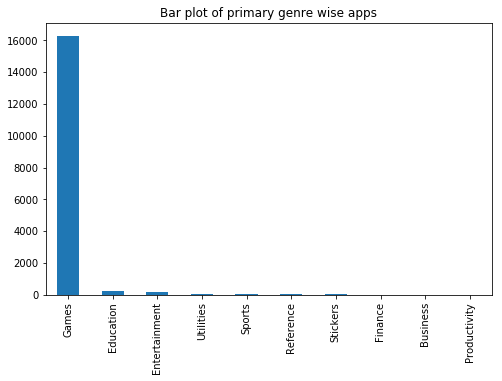

In [31]:
df[df["Primary Genre"].isin(top_genres)]["Primary Genre"].value_counts().plot.bar(figsize=(8,5))
plt.title("Bar plot of primary genre wise apps")
plt.show()

## What are the most popular genres?
* Games, Strategy and Entertainment are the three most popular genres.
* Strategy, Battle and Puzzle are the most frequently used words in subtitles.

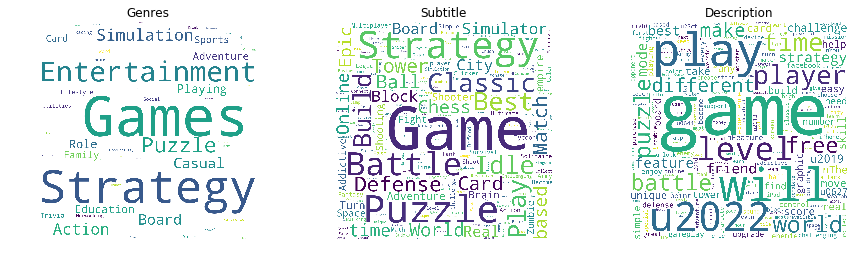

In [32]:
def word_cloud(list_variable):
    fig, ax = plt.subplots(1,3, figsize=(15,4))
    for i, variable in enumerate(list_variable):
        corpus = df[variable].dropna()
        if variable not in ("Genres"):
            corpus = corpus.map(lambda x: x.replace(",", "").split(" "))
            corpus = corpus.map(lambda x: [word for word in x if len(word) > 3])
        corpus = ",".join(word for word_list in corpus for word in word_list)
        wordcloud = WordCloud(max_font_size=None, background_color="white", collocations=False, width=1500, height=1500).generate(corpus)
        ax[i].imshow(wordcloud)
        ax[i].set_title(variable)
        ax[i].axis("off")
    plt.show()

word_cloud(["Genres", "Subtitle", "Description"])

## What is the highest and lowest rated genre?
* Sports genre is having the highest average user rating.
* Business genre is having the lowest average user rating.

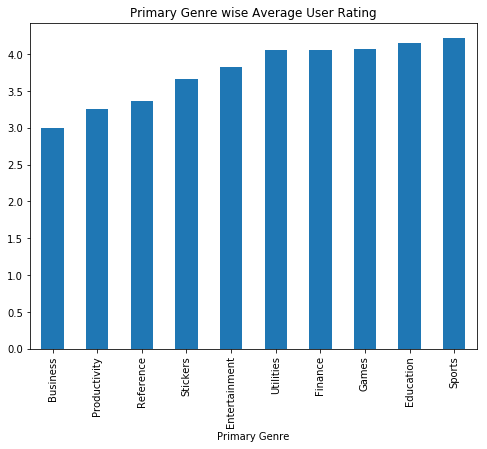

In [33]:
df[df["Primary Genre"].isin(top_genres)].groupby("Primary Genre")["Average User Rating"].agg("mean").sort_values().plot.bar(figsize=(8,6))
plt.title("Primary Genre wise Average User Rating")
plt.show()

## Genre wise age rating proportions.
* In all the genres, 4+ age rating is having the higest proportion of apps.
* Productivity genre is having all of its apps with 4+ age rating.
* Sports genre is having almost 50% of the apps under 12+ and 17+ rating. 

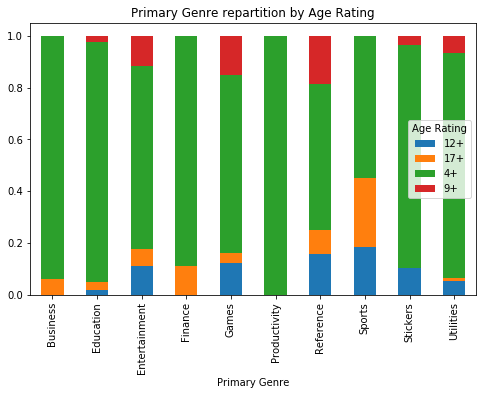

In [34]:
ct_genre_agerating = pd.crosstab(df[df["Primary Genre"].isin(top_genres)]["Primary Genre"], df["Age Rating"], normalize=0)
ct_genre_agerating.plot.bar(stacked=True, figsize=(8,5))
plt.title("Primary Genre repartition by Age Rating")
plt.show()

## Which age rating has the highest and least proportion of apps?
* Age rating 4+ has the highest proportion of apps.
* Age rating 17+ has the least proportion of apps.
* As age rating increases, proportion of apps decreases.

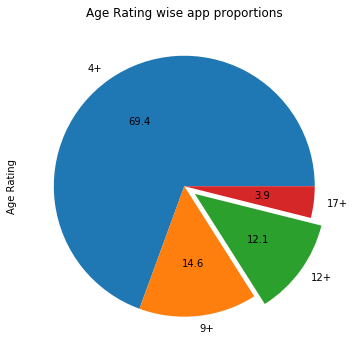

In [35]:
df["Age Rating"].value_counts().plot.pie(autopct="%1.1f", explode=[0,0,0.1,0], figsize=(6,6))
plt.title("Age Rating wise app proportions")
plt.show()

## Average size of apps in each Primary Genre
* Games genre is having average highest average size of apps, around 110 MB.

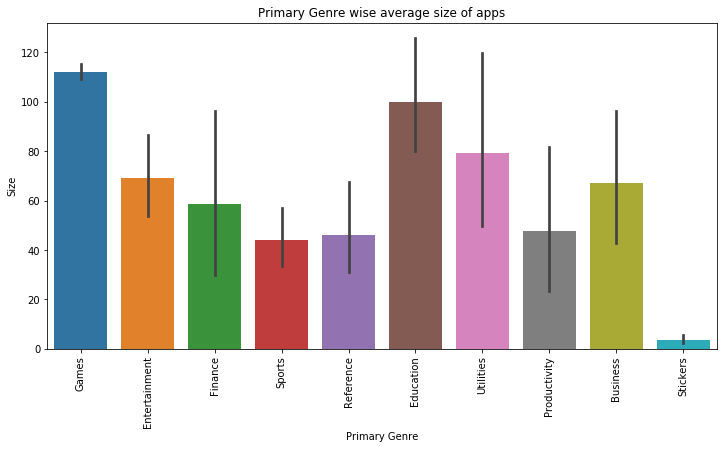

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(data=df[df["Primary Genre"].isin(top_genres)], x="Primary Genre", y="Size")
plt.xticks(rotation=90)
plt.title("Primary Genre wise average size of apps")
plt.show()

## Which price range bracket has the highest and least proportion of apps?
* Most of the apps available are for free (83.7%).
* There are few apps which are medium (1.6%) and high (0.2%) priced.
* As the price of the apps increases, we see number of apps descreases drastically.

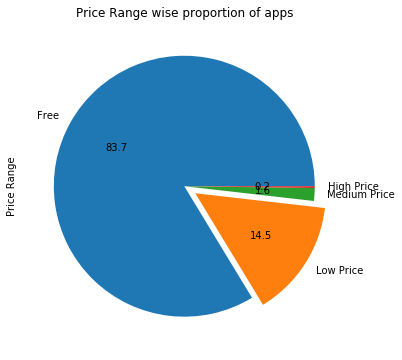

In [37]:
df["Price Range"].dropna().value_counts().plot.pie(autopct="%1.1f", explode=[0,0.1,0,0], figsize=(6,6))
plt.title("Price Range wise proportion of apps")
plt.show()

## Age Rating repartitioned by Price Range
* There seems to be no significant change in the proportion of price range in all the four age rating categories.

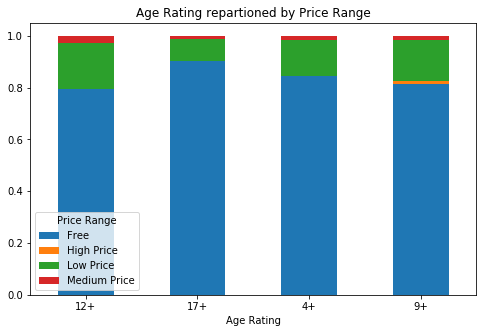

In [38]:
ct_agerating_pricerange = pd.crosstab(df["Age Rating"], df["Price Range"], normalize=0)
ct_agerating_pricerange.plot.bar(stacked=True, figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Age Rating repartioned by Price Range")
plt.show()

## Average user rating for each price range
* There seems to be no difference in average user rating across price range.

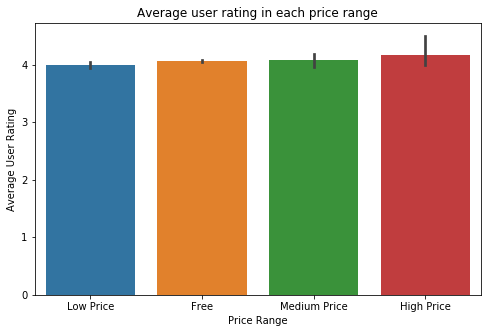

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Price Range", y="Average User Rating")
plt.title("Average user rating in each price range")
plt.show()

## Which genre and age rating has the most number of in-app purchases on average?
* Finance genre is having the highest no. of in-app purhases on average.
* Finance and Games genres are having more no. of in-app purhases than education on an average.
* Age rating group 12+ is having the highest no. of in-app purhases on average.

## Which genre and age rating has the highest value of in-app purchases on average?
* Finance genre is having the highest value of in-app purchases on average.
* Age rating 12+ is having the highest value of in-app purchases on average.

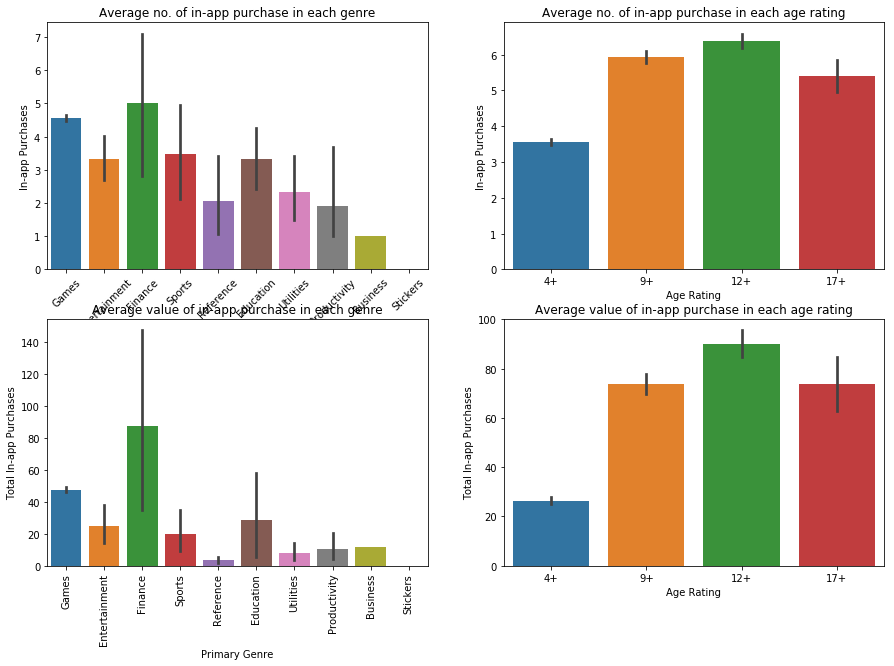

In [40]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.barplot(data=df[df["Primary Genre"].isin(top_genres)], x="Primary Genre", y=df["In-app Purchases"].dropna().map(lambda x: len(x)), ax=ax[0,0]).set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
sns.barplot(data=df, x="Age Rating", y=df["In-app Purchases"].dropna().map(lambda x: len(x)), ax=ax[0,1])
sns.barplot(data=df[df["Primary Genre"].isin(top_genres)], x="Primary Genre", y="Total In-app Purchases", ax=ax[1,0]).set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)
sns.barplot(data=df, x="Age Rating", y="Total In-app Purchases", ax=ax[1,1])
ax[0,0].set_title("Average no. of in-app purchase in each genre")
ax[0,1].set_title("Average no. of in-app purchase in each age rating")
ax[1,0].set_title("Average value of in-app purchase in each genre")
ax[1,1].set_title("Average value of in-app purchase in each age rating")
plt.show()

## Which genres is games are having most no. of games?
* Strategy genre is having the most no. of games.

## What is the highest rated genre?
* There seems to be no difference in the average user rating across genres.

In [41]:
# creating list of top game genres
top_game_genre = list(df["Game Genre"].value_counts().head(11).index)

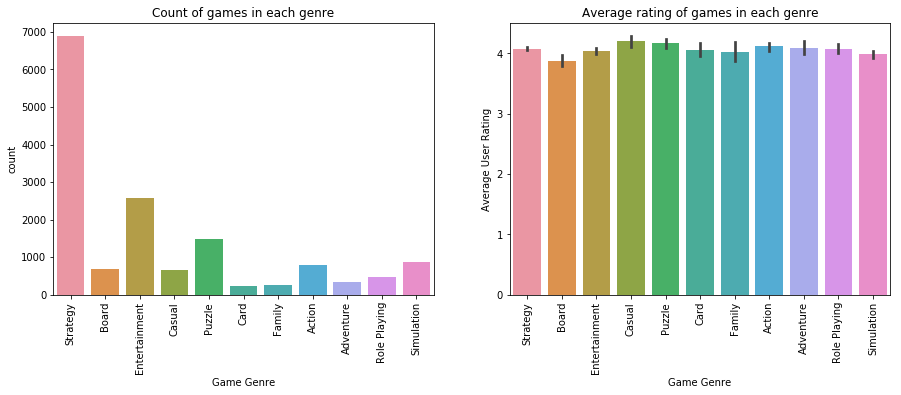

In [42]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df[df["Game Genre"].isin(top_game_genre)], x="Game Genre", ax=ax[0]).set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.barplot(data=df[df["Game Genre"].isin(top_game_genre)], x="Game Genre", y="Average User Rating", ax=ax[1]).set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_title("Count of games in each genre")
ax[1].set_title("Average rating of games in each genre")
plt.show()

## In-app purchases trend in different genres of games
* Role playing games are having highest no. of in-app purchases and total value of in-app purchases on an average.

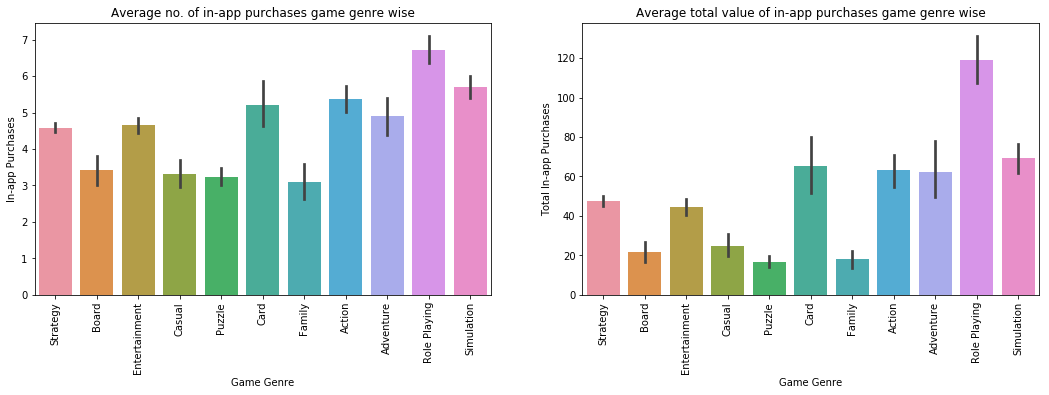

In [51]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
sns.barplot(data=df[df["Game Genre"].isin(top_game_genre)], x="Game Genre", y=df["In-app Purchases"].dropna().map(lambda x: len(x)), ax=ax[0]).set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.barplot(data=df[df["Game Genre"].isin(top_game_genre)], x="Game Genre", y="Total In-app Purchases", ax=ax[1]).set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title("Average no. of in-app purchases game genre wise")
ax[1].set_title("Average total value of in-app purchases game genre wise")
plt.show()

## Correlation heat map of continuous variables
* There seems to be no strong positive or negative correlation between any two continuous variables.

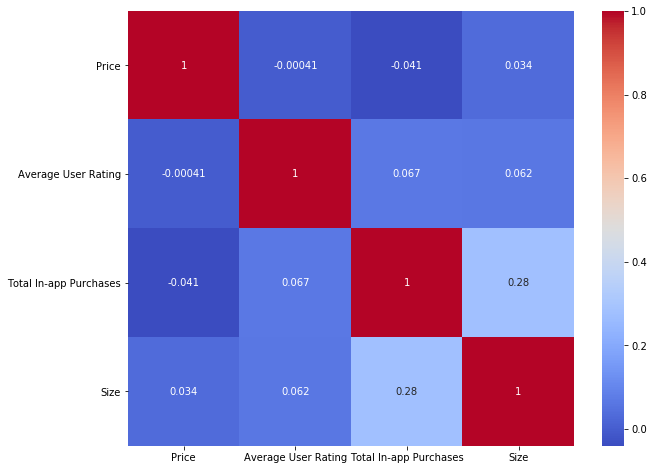

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["Price","Average User Rating","Total In-app Purchases","Age Rating","Size"]].corr(), annot=True, cmap="coolwarm")
plt.show()

## Timeseries analysis of apps
* No. of apps released showed increasing trend till 2016, peaked in 2016, and then decreased in following years.
* No. of apps released in highest during the month of September.

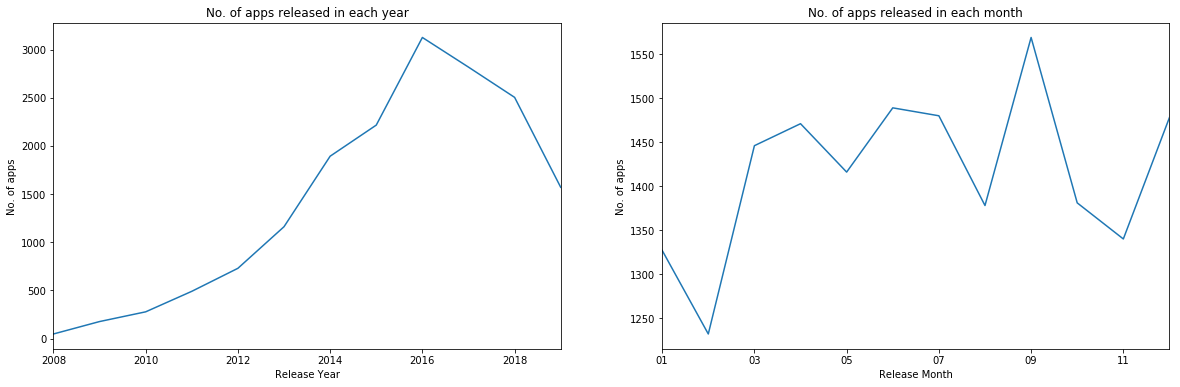

In [99]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
df.groupby("Release Year")["Name"].agg("count").plot(ax=ax[0])
df.groupby("Release Month")["Name"].agg("count").plot(ax=ax[1])
ax[0].set_ylabel("No. of apps")
ax[1].set_ylabel("No. of apps")
ax[0].set_title("No. of apps released in each year")
ax[1].set_title('No. of apps released in each month')
plt.show()